## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

______________

In [6]:
"""
Compile 模型
"""
model.summary()

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.0675 - accuracy: 0.2705 - val_loss: 1.9542 - val_accuracy: 0.2878
Epoch 2/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.8818 - accuracy: 0.3363 - val_loss: 1.8564 - val_accuracy: 0.3454
Epoch 3/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.8142 - accuracy: 0.3641 - val_loss: 1.7940 - val_accuracy: 0.3670
Epoch 4/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.7719 - accuracy: 0.3771 - val_loss: 1.7991 - val_accuracy: 0.3574
Epoch 5/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.7332 - accuracy: 0.3920 - val_loss: 1.7860 - val_accuracy: 0.3407
Epoch 6/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.7053 - accuracy: 0.3998 - val_loss: 1.7539 - val_accuracy: 0.3814
Epoch 7/500
50000/50000 [==============================] - 3s 

Epoch 56/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.1933 - accuracy: 0.5809 - val_loss: 1.4505 - val_accuracy: 0.4824
Epoch 57/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1855 - accuracy: 0.5821 - val_loss: 1.4126 - val_accuracy: 0.4917
Epoch 58/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1713 - accuracy: 0.5872 - val_loss: 1.4408 - val_accuracy: 0.4883
Epoch 59/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.1669 - accuracy: 0.5906 - val_loss: 1.4011 - val_accuracy: 0.5015
Epoch 60/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1685 - accuracy: 0.5898 - val_loss: 1.3554 - val_accuracy: 0.5168
Epoch 61/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1615 - accuracy: 0.5919 - val_loss: 1.3744 - val_accuracy: 0.5163
Epoch 62/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.1505 - accuracy: 0.5967

Epoch 165/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.6164 - accuracy: 0.7899 - val_loss: 1.4726 - val_accuracy: 0.5393
Epoch 166/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.6145 - accuracy: 0.7914 - val_loss: 1.8998 - val_accuracy: 0.4781
Epoch 167/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.6142 - accuracy: 0.7921 - val_loss: 1.5529 - val_accuracy: 0.5275
Epoch 168/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.6017 - accuracy: 0.7939 - val_loss: 1.6524 - val_accuracy: 0.5067
Epoch 169/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.6073 - accuracy: 0.7915 - val_loss: 1.7617 - val_accuracy: 0.4927
Epoch 170/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.6009 - accuracy: 0.7944 - val_loss: 1.5876 - val_accuracy: 0.5213
Epoch 171/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.5814 - accuracy:

Epoch 274/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1913 - accuracy: 0.9522 - val_loss: 2.1721 - val_accuracy: 0.5350
Epoch 275/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.1822 - accuracy: 0.9519 - val_loss: 2.1636 - val_accuracy: 0.5122
Epoch 276/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2138 - accuracy: 0.9407 - val_loss: 2.2039 - val_accuracy: 0.5370
Epoch 277/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1615 - accuracy: 0.9563 - val_loss: 3.0780 - val_accuracy: 0.4331
Epoch 278/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2118 - accuracy: 0.9461 - val_loss: 2.2595 - val_accuracy: 0.5295
Epoch 279/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.2160 - accuracy: 0.9460 - val_loss: 2.2865 - val_accuracy: 0.5118
Epoch 280/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1421 - accuracy:

Epoch 383/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.4481 - accuracy: 0.8515 - val_loss: 2.8025 - val_accuracy: 0.4943
Epoch 384/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.3584 - accuracy: 0.8889 - val_loss: 2.5866 - val_accuracy: 0.5147
Epoch 385/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2223 - accuracy: 0.9367 - val_loss: 2.7343 - val_accuracy: 0.5101
Epoch 386/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1974 - accuracy: 0.9445 - val_loss: 2.5294 - val_accuracy: 0.5348
Epoch 387/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0603 - accuracy: 0.9909 - val_loss: 2.5994 - val_accuracy: 0.5352
Epoch 388/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1491 - accuracy: 0.9657 - val_loss: 2.7668 - val_accuracy: 0.5076
Epoch 389/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.1483 - accuracy:

Epoch 492/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0124 - accuracy: 0.9998 - val_loss: 3.0691 - val_accuracy: 0.5385
Epoch 493/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0125 - accuracy: 0.9998 - val_loss: 3.0503 - val_accuracy: 0.5399
Epoch 494/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0120 - accuracy: 0.9998 - val_loss: 3.0653 - val_accuracy: 0.5362
Epoch 495/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0120 - accuracy: 0.9999 - val_loss: 3.0826 - val_accuracy: 0.5375
Epoch 496/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0118 - accuracy: 0.9999 - val_loss: 3.0796 - val_accuracy: 0.5348
Epoch 497/500
50000/50000 [==============================] - 3s 54us/step - loss: 0.0114 - accuracy: 0.9999 - val_loss: 3.0913 - val_accuracy: 0.5363
Epoch 498/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0112 - accuracy:

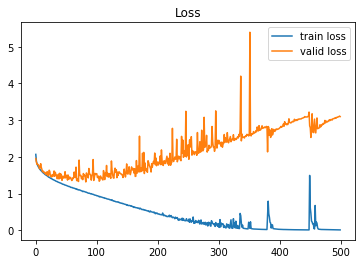

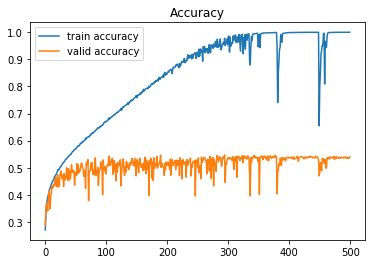

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Adam(epochs=500) 

In [5]:
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.9142 - accuracy: 0.3087 - val_loss: 1.7449 - val_accuracy: 0.3805
Epoch 2/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6964 - accuracy: 0.3950 - val_loss: 1.6856 - val_accuracy: 0.4017
Epoch 3/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6099 - accuracy: 0.4249 - val_loss: 1.6449 - val_accuracy: 0.4071
Epoch 4/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.5452 - accuracy: 0.4483 - val_loss: 1.5333 - val_accuracy: 0.4563
Epoch 5/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4911 - accuracy: 0.4695 - val_loss: 1.5099 - val_accuracy: 0.4663
Epoch 6/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.4573 - accuracy: 0.4785 - val_loss: 1.4757 - val_accuracy: 0.4784
Epoch 7/500
50000/50000 [==============================] - 3s

Epoch 56/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.5636 - accuracy: 0.7984 - val_loss: 2.0287 - val_accuracy: 0.5047
Epoch 57/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.5645 - accuracy: 0.7977 - val_loss: 2.0002 - val_accuracy: 0.5083
Epoch 58/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.5475 - accuracy: 0.8041 - val_loss: 2.0436 - val_accuracy: 0.5108
Epoch 59/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.5234 - accuracy: 0.8138 - val_loss: 2.0890 - val_accuracy: 0.5131
Epoch 60/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.5140 - accuracy: 0.8165 - val_loss: 2.1140 - val_accuracy: 0.5073
Epoch 61/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.5063 - accuracy: 0.8187 - val_loss: 2.1283 - val_accuracy: 0.5038
Epoch 62/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.5069 - accuracy: 0.8184

Epoch 111/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.2048 - accuracy: 0.9269 - val_loss: 3.6295 - val_accuracy: 0.4984
Epoch 112/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.2165 - accuracy: 0.9228 - val_loss: 3.7842 - val_accuracy: 0.5013
Epoch 113/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2311 - accuracy: 0.9171 - val_loss: 3.6447 - val_accuracy: 0.4986
Epoch 114/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2428 - accuracy: 0.9137 - val_loss: 3.8128 - val_accuracy: 0.4927
Epoch 115/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2355 - accuracy: 0.9158 - val_loss: 3.9205 - val_accuracy: 0.4950
Epoch 116/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.2830 - accuracy: 0.8989 - val_loss: 3.7839 - val_accuracy: 0.4991
Epoch 117/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.2330 - accuracy:

50000/50000 [==============================] - 3s 68us/step - loss: 0.1507 - accuracy: 0.9465 - val_loss: 5.0248 - val_accuracy: 0.4963
Epoch 166/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.1313 - accuracy: 0.9532 - val_loss: 5.0423 - val_accuracy: 0.4940
Epoch 167/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.1816 - accuracy: 0.9352 - val_loss: 5.2481 - val_accuracy: 0.4900
Epoch 168/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2366 - accuracy: 0.9180 - val_loss: 4.9764 - val_accuracy: 0.4908
Epoch 169/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.2058 - accuracy: 0.9287 - val_loss: 5.1203 - val_accuracy: 0.4801
Epoch 170/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.1560 - accuracy: 0.9442 - val_loss: 5.0659 - val_accuracy: 0.4973
Epoch 171/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1227 - accuracy: 0.9557 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.1231 - accuracy: 0.9574 - val_loss: 5.8592 - val_accuracy: 0.4978
Epoch 221/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.1008 - accuracy: 0.9644 - val_loss: 5.9922 - val_accuracy: 0.4845
Epoch 222/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.1593 - accuracy: 0.9462 - val_loss: 5.8480 - val_accuracy: 0.4900
Epoch 223/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.1675 - accuracy: 0.9412 - val_loss: 5.9513 - val_accuracy: 0.4950
Epoch 224/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1161 - accuracy: 0.9601 - val_loss: 5.9533 - val_accuracy: 0.4912
Epoch 225/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0845 - accuracy: 0.9710 - val_loss: 6.1301 - val_accuracy: 0.4928
Epoch 226/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0905 - accuracy

50000/50000 [==============================] - 4s 74us/step - loss: 0.1726 - accuracy: 0.9438 - val_loss: 6.8595 - val_accuracy: 0.4827
Epoch 275/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1483 - accuracy: 0.9500 - val_loss: 6.5465 - val_accuracy: 0.4935
Epoch 276/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1576 - accuracy: 0.9482 - val_loss: 6.4170 - val_accuracy: 0.4957
Epoch 277/500
50000/50000 [==============================] - 3s 65us/step - loss: 0.1191 - accuracy: 0.9599 - val_loss: 6.5817 - val_accuracy: 0.4954
Epoch 278/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1143 - accuracy: 0.9608 - val_loss: 6.5717 - val_accuracy: 0.4940
Epoch 279/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0480 - accuracy: 0.9835 - val_loss: 6.5684 - val_accuracy: 0.4956
Epoch 280/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.0755 - accuracy: 0.9735 - val_

Epoch 329/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.1432 - accuracy: 0.9523 - val_loss: 6.8483 - val_accuracy: 0.4924
Epoch 330/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0739 - accuracy: 0.9748 - val_loss: 7.0222 - val_accuracy: 0.4896
Epoch 331/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0640 - accuracy: 0.9783 - val_loss: 7.1157 - val_accuracy: 0.4966
Epoch 332/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.1444 - accuracy: 0.9536 - val_loss: 7.0924 - val_accuracy: 0.4830
Epoch 333/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.1095 - accuracy: 0.9632 - val_loss: 6.9317 - val_accuracy: 0.4954
Epoch 334/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.1068 - accuracy: 0.9636 - val_loss: 6.9884 - val_accuracy: 0.4899
Epoch 335/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.1011 - accuracy

50000/50000 [==============================] - 3s 65us/step - loss: 0.0480 - accuracy: 0.9840 - val_loss: 7.5728 - val_accuracy: 0.4907
Epoch 384/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.1464 - accuracy: 0.9534 - val_loss: 7.3998 - val_accuracy: 0.4924
Epoch 385/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0716 - accuracy: 0.9757 - val_loss: 7.3599 - val_accuracy: 0.4973
Epoch 386/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0713 - accuracy: 0.9759 - val_loss: 7.7152 - val_accuracy: 0.4917
Epoch 387/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0978 - accuracy: 0.9675 - val_loss: 7.7371 - val_accuracy: 0.4883
Epoch 388/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0840 - accuracy: 0.9722 - val_loss: 7.4156 - val_accuracy: 0.4913
Epoch 389/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.1097 - accuracy: 0.9643 - val_

Epoch 438/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 7.2677 - val_accuracy: 0.4975
Epoch 439/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 7.3187 - val_accuracy: 0.4983
Epoch 440/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 7.4088 - val_accuracy: 0.4982
Epoch 441/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 7.4380 - val_accuracy: 0.4996
Epoch 442/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 7.5530 - val_accuracy: 0.5004
Epoch 443/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 7.5961 - val_accuracy: 0.5009
Epoch 444/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.4763 - accuracy:

50000/50000 [==============================] - 3s 62us/step - loss: 0.0744 - accuracy: 0.9752 - val_loss: 5.6898 - val_accuracy: 0.4997
Epoch 493/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0279 - accuracy: 0.9932 - val_loss: 5.7604 - val_accuracy: 0.5016
Epoch 494/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 5.9526 - val_accuracy: 0.5044
Epoch 495/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 6.0407 - val_accuracy: 0.5067
Epoch 496/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 6.1576 - val_accuracy: 0.5061
Epoch 497/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 6.3046 - val_accuracy: 0.5056
Epoch 498/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.0036 - accuracy: 1.0000 - val_

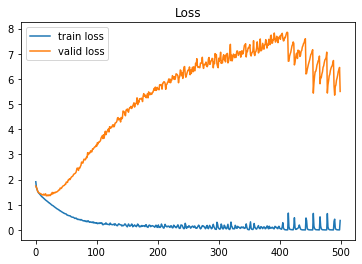

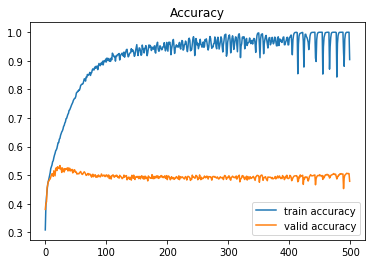

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()